In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import keras
from keras import layers, models, metrics, backend as K, optimizers
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

/home/iron/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('./train/train_data.csv', encoding='cp949')
test_data = pd.read_csv('./test/test_data.csv', encoding='cp949')
train_label = pd.read_csv('./train/train_label.csv', encoding='cp949')

In [3]:
Y = train_data[['2month', 'month', 'retained', 'week']].values
x_train_data = train_data.drop(columns=['2month', 'month', 'retained', 'week', 'acc_id'])
X = x_train_data.astype('float').values

In [4]:
test_acc_id = test_data[['acc_id']]
X_test = test_data.drop(columns=['acc_id'])

In [5]:
input_data = layers.Input(shape=(len(X[0]),))
x = layers.Dense((512), activation='relu')(input_data)
x = layers.Dropout(0.3)(x)
x = layers.Dense((600), activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense((600), activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense((512), activation='relu')(x)
x = layers.Dropout(0.3)(x)
output_data = layers.Dense(len(Y[0]), activation='softmax')(x)

In [6]:
model = models.Model(inputs=input_data, outputs=output_data)

In [7]:
# Hyper Parameters 
epochs = 400
batch_size = 256

In [8]:
model.compile(optimizer=optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1, factor=0.5, min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
#     EarlyStopping('val_loss', patience=20)# val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
]

hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.2 )

Train on 53425 samples, validate on 13357 samples
Epoch 1/400
53425/53425 [==============================] - 2s 44us/step - loss: 0.4766 - acc: 0.7618 - val_loss: 0.4620 - val_acc: 0.7655
Epoch 2/400
53425/53425 [==============================] - 1s 22us/step - loss: 0.4673 - acc: 0.7648 - val_loss: 0.4587 - val_acc: 0.7657
Epoch 3/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4648 - acc: 0.7669 - val_loss: 0.4560 - val_acc: 0.7726
Epoch 4/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4621 - acc: 0.7697 - val_loss: 0.4635 - val_acc: 0.7676
Epoch 5/400
53425/53425 [==============================] - 1s 22us/step - loss: 0.4603 - acc: 0.7713 - val_loss: 0.4509 - val_acc: 0.7766
Epoch 6/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4576 - acc: 0.7732 - val_loss: 0.4465 - val_acc: 0.7779
Epoch 7/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4559 - acc: 0.7746 - val_loss: 0.4478 - 

53425/53425 [==============================] - 1s 21us/step - loss: 0.4353 - acc: 0.7877 - val_loss: 0.4310 - val_acc: 0.7898

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 60/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4344 - acc: 0.7883 - val_loss: 0.4308 - val_acc: 0.7904
Epoch 61/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4334 - acc: 0.7885 - val_loss: 0.4287 - val_acc: 0.7908
Epoch 62/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4340 - acc: 0.7878 - val_loss: 0.4280 - val_acc: 0.7906
Epoch 63/400
53425/53425 [==============================] - 1s 22us/step - loss: 0.4328 - acc: 0.7891 - val_loss: 0.4259 - val_acc: 0.7908
Epoch 64/400
53425/53425 [==============================] - 1s 22us/step - loss: 0.4332 - acc: 0.7882 - val_loss: 0.4279 - val_acc: 0.7905
Epoch 65/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4330 - acc: 0.7

53425/53425 [==============================] - 1s 21us/step - loss: 0.4272 - acc: 0.7912 - val_loss: 0.4230 - val_acc: 0.7939
Epoch 116/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4272 - acc: 0.7907 - val_loss: 0.4246 - val_acc: 0.7932
Epoch 117/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4270 - acc: 0.7911 - val_loss: 0.4238 - val_acc: 0.7925
Epoch 118/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4271 - acc: 0.7909 - val_loss: 0.4242 - val_acc: 0.7940
Epoch 119/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4270 - acc: 0.7915 - val_loss: 0.4231 - val_acc: 0.7972

Epoch 00119: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 120/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4267 - acc: 0.7910 - val_loss: 0.4231 - val_acc: 0.7955
Epoch 121/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4269 - a

Epoch 171/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4260 - acc: 0.7915 - val_loss: 0.4225 - val_acc: 0.8001
Epoch 172/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4258 - acc: 0.7915 - val_loss: 0.4224 - val_acc: 0.8005

Epoch 00172: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.
Epoch 173/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4261 - acc: 0.7916 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 174/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4258 - acc: 0.7917 - val_loss: 0.4224 - val_acc: 0.8003
Epoch 175/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4259 - acc: 0.7922 - val_loss: 0.4225 - val_acc: 0.8003
Epoch 176/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4257 - acc: 0.7919 - val_loss: 0.4223 - val_acc: 0.8008
Epoch 177/400
53425/53425 [==============================] - 1s 21us/step - los

Epoch 226/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4257 - acc: 0.7918 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 227/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4257 - acc: 0.7918 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 228/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4253 - acc: 0.7920 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 229/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4258 - acc: 0.7915 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 230/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4256 - acc: 0.7920 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 231/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4255 - acc: 0.7914 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 232/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4256 - acc: 0.7921 - val_loss: 0.4224 - val_acc: 0.8004

Epoch 00232: Reduce

Epoch 284/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4257 - acc: 0.7920 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 285/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4255 - acc: 0.7920 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 286/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4253 - acc: 0.7920 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 287/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4258 - acc: 0.7916 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 288/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4251 - acc: 0.7931 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 289/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4256 - acc: 0.7919 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 290/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4256 - acc: 0.7921 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 291/400
53425/

53425/53425 [==============================] - 1s 21us/step - loss: 0.4259 - acc: 0.7917 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 343/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4261 - acc: 0.7915 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 344/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4255 - acc: 0.7921 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 345/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4255 - acc: 0.7919 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 346/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4256 - acc: 0.7918 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 347/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4256 - acc: 0.7918 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 348/400
53425/53425 [==============================] - 1s 21us/step - loss: 0.4258 - acc: 0.7913 - val_loss: 0.4224 - val_acc: 0.8004
Epoch 349/400
53425/53425 [=======

53425/53425 [==============================] - 1s 21us/step - loss: 0.4257 - acc: 0.7923 - val_loss: 0.4224 - val_acc: 0.8004


In [9]:
Y_pred = model.predict(X_test, batch_size=1024)

In [10]:
label_encoder = LabelEncoder()
label_encoder.fit(train_label.label)

LabelEncoder()

In [11]:
# Submission Deep Learning (Dense)
submission = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission = pd.concat([test_acc_id, pd.DataFrame(submission, columns=['label'])], axis=1)
submission.to_csv('./submission.csv', index=False)

/home/iron/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [12]:
submission

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,retained
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained


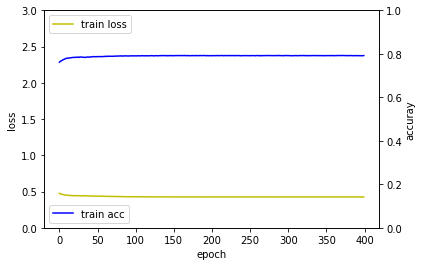

In [13]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 3.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [14]:
# Submission1 Random Forest Classifier

forest = RandomForestClassifier(n_estimators = 700, n_jobs = -1, max_depth = 10)
%time forest = forest.fit(X, Y)
Y_pred = forest.predict(X_test)

CPU times: user 2min 20s, sys: 0 ns, total: 2min 20s
Wall time: 19.3 s


In [15]:
forest.score(X, Y)

0.47312149980533674

In [16]:
submission1 = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission1 = pd.concat([test_acc_id, pd.DataFrame(submission1, columns=['label'])], axis=1)
submission1.to_csv('./submission1.csv', index=False)

/home/iron/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
submission1

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,2month
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,2month
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,2month
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,2month
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,2month
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,2month
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained


In [18]:
pd.merge(submission, submission1, on='acc_id')

,acc_id,label_x,label_y
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,retained,2month
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained,2month
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,retained,2month
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,retained,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,retained,2month
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,retained,2month
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,retained,2month
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained,retained


In [19]:
# Submission2 KNN

neigh = KNeighborsClassifier(n_neighbors=3)
%time neigh = neigh.fit(X, Y)
Y_pred = neigh.predict(X_test)

CPU times: user 1.28 s, sys: 0 ns, total: 1.28 s
Wall time: 1.27 s


In [20]:
neigh.score(X, Y)

0.7147884160402503

In [21]:
submission2 = label_encoder.inverse_transform([np.argmax(Y_pred[:], axis=1)]).reshape((-1,1))
submission2 = pd.concat([test_acc_id, pd.DataFrame(submission2, columns=['label'])], axis=1)
submission2.to_csv('./submission2.csv', index=False)

/home/iron/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
submission2

,acc_id,label
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,2month
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,2month
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,2month
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,2month
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,2month
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained


In [23]:
pd.merge(submission1, submission2, on='acc_id')

,acc_id,label_x,label_y
0,fa5e9cb3dadb37c4797ca7785ea99558ebef24bcbbf844...,2month,2month
1,ab6586a9739bb1644f0178e7b4cac5638c1a74bd79bee7...,2month,retained
2,5ee147701a3df678ca18f96b9676c01c3a885fd1010699...,2month,2month
3,36c84995ef772131e89516228ad99051c99f5f6f51d763...,2month,2month
4,5418e41497f5d8a8013ad0ad98275d2126a5c9530cd3fa...,2month,2month
5,ddd4327ca0426225c900d9a176ed8eb0d047366d935751...,2month,2month
6,a0714feedb6bfdca4ff1b41cad71cf97a5b1efbb0279c4...,retained,retained
7,41a4f1cc7559321af79dfbab7fad9ab9b6be317df08ada...,2month,2month
8,662538b2d503d1da5bcd1a53ecbcffd388766d7d0b0b74...,2month,2month
9,4fd3e6268fa841d4576252270597b4adaf76c2aec130c1...,retained,retained
